In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elderly-health-monitoring-dataset/Seniors_Monitoring_DataSet_Celsius.csv


In [2]:
!pip install scikit-learn==1.5.2 --upgrade --quiet
import sklearn
print(sklearn.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.3 MB/s eta 0:00:00:00:010:01
1.5.2


In [3]:
df = pd.read_csv('/kaggle/input/elderly-health-monitoring-dataset/Seniors_Monitoring_DataSet_Celsius.csv')
df

,Body_Temperature,Heart_Rate,SPO2,Driver_State
0,37.166667,62,91,Normal
1,37.200000,62,91,Normal
2,37.222222,62,91,Normal
3,35.900000,65,98,Normal
4,35.983333,65,98,Normal
...,...,...,...,...
1225,39.555556,96,94,Critical
1226,35.100000,97,60,Critical
1227,36.500000,107,96,Critical
1228,37.000000,108,96,Critical


In [4]:
df.rename(columns={'Driver_State': 'Elderly_State'}, inplace=True)
print(df.columns)

Index(['Body_Temperature', 'Heart_Rate', 'SPO2', 'Elderly_State'], dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Body_Temperature  1230 non-null   float64
 1   Heart_Rate        1230 non-null   int64  
 2   SPO2              1230 non-null   int64  
 3   Elderly_State     1230 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 38.6+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Body_Temperature,Heart_Rate,SPO2
count,1230.000000,1230.000000,1230.000000
mean,37.462416,74.349593,80.031707
std,1.453960,9.697528,11.882314
min,34.444444,54.000000,60.000000
25%,36.200000,67.000000,70.000000
50%,37.400000,74.000000,80.000000
75%,38.700000,81.000000,90.000000
max,40.277778,109.000000,100.000000


<Axes: >

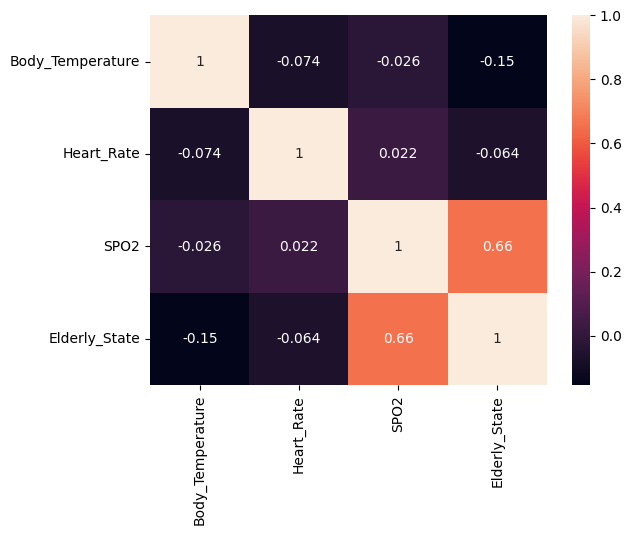

In [8]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# ترميز الأعمدة الفئوية فقط
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# حساب الارتباط ورسم الخريطة
cor = df_encoded.corr()
sns.heatmap(cor, annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

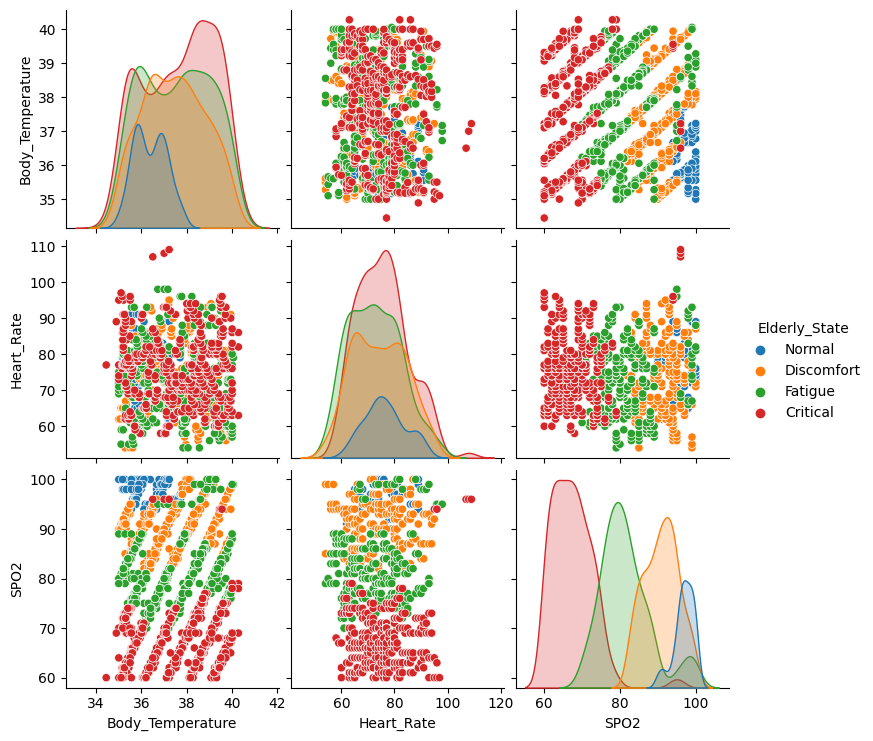

In [9]:
import matplotlib.pyplot as plt

df_copy = df.copy()
sns.pairplot(df_copy, hue="Elderly_State", vars=["Body_Temperature", "Heart_Rate", "SPO2"])
plt.show()

In [10]:
df['Elderly_State'] = df['Elderly_State'].replace({'Fatigue': 'Critical'})

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

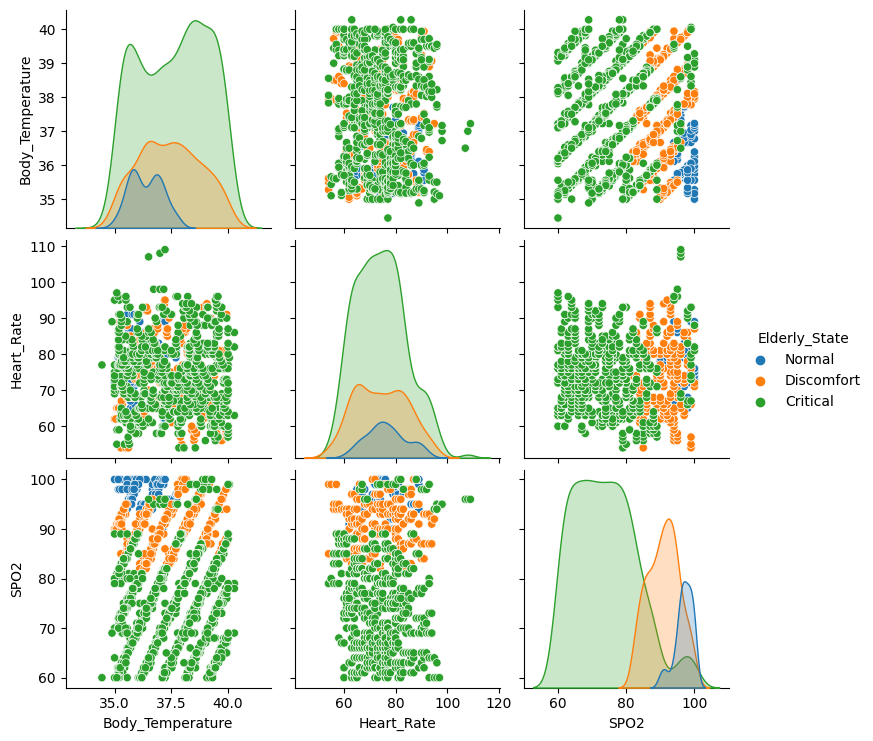

In [11]:
import matplotlib.pyplot as plt

df_copy = df.copy()
sns.pairplot(df_copy, hue="Elderly_State", vars=["Body_Temperature", "Heart_Rate", "SPO2"])
plt.show()

Distribution of each label as percentage:
 Elderly_State
Critical      66.666667
Discomfort    25.203252
Normal         8.130081
Name: proportion, dtype: float64


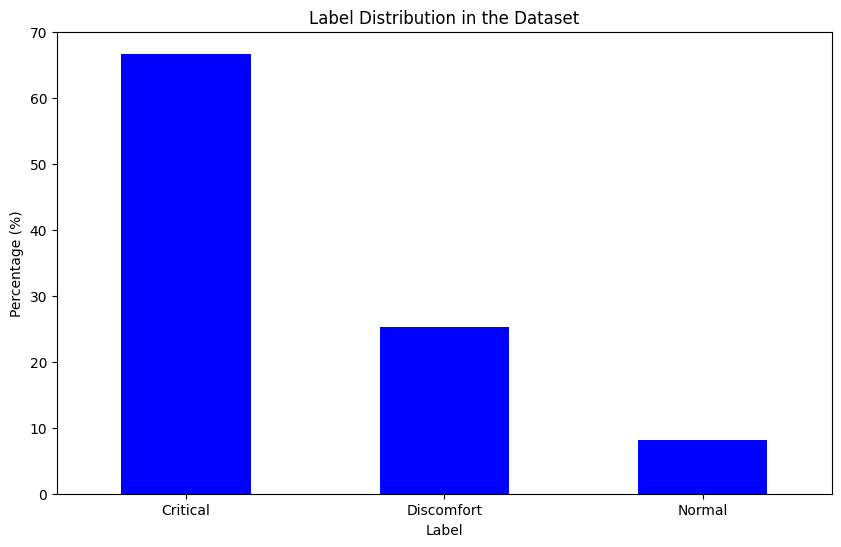

In [12]:
import matplotlib.pyplot as plt

# Calculate the distribution for each category
label_counts = df['Elderly_State'].value_counts(normalize=True) * 100

# Print the percentage for each category
print("Distribution of each label as percentage:\n", label_counts)

# A graph showing the distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='blue')
plt.title("Label Distribution in the Dataset")
plt.xlabel("Label")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

x = df.drop(["Elderly_State"], axis=1)
y = pd.DataFrame(df["Elderly_State"])

# التأكد من أن y_train في شكل مصفوفة أرقام وليس DataFrame
y = y.values.ravel() if hasattr(y, "values") else y

# حساب توزيع الفئات قبل المعالجة
class_counts = Counter(y)
print("Class distribution before processing:", class_counts)

under_sampler = EditedNearestNeighbours(n_neighbors=3)

# تطبيق إعادة التوازن
X_enn, y_enn = under_sampler.fit_resample(x, y)

# حساب توزيع الفئات بعد المعالجة
new_class_counts = Counter(y_enn)
print("Class distribution after processing:", new_class_counts) 

Class distribution before processing: Counter({'Critical': 820, 'Discomfort': 310, 'Normal': 100})
Class distribution after processing: Counter({'Critical': 747, 'Discomfort': 226, 'Normal': 100})


In [14]:
X_enn_df = pd.DataFrame(X_enn, columns=x.columns)
y_enn_df = pd.DataFrame(y_enn, columns=["Elderly_State"])

df_enn = pd.concat([X_enn_df, y_enn_df], axis=1)
df_enn

,Body_Temperature,Heart_Rate,SPO2,Elderly_State
0,37.833333,54,79,Critical
1,38.055556,54,79,Critical
2,38.555556,54,79,Critical
3,35.100000,55,80,Critical
4,35.433333,55,80,Critical
...,...,...,...,...
1068,35.555556,89,94,Normal
1069,36.111111,89,94,Normal
1070,35.555556,91,98,Normal
1071,35.777778,91,98,Normal


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

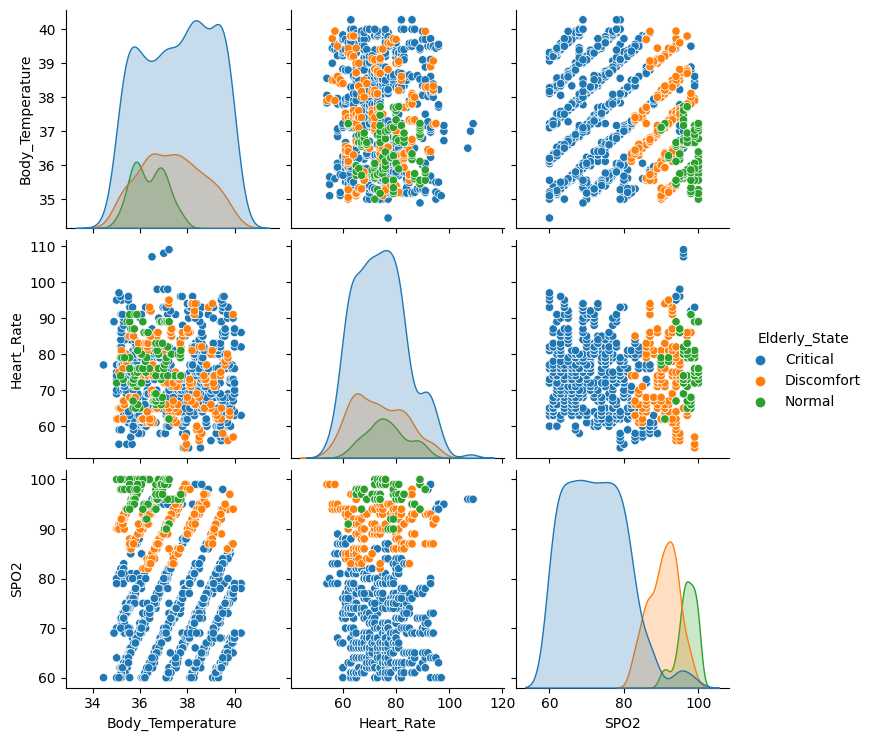

In [15]:
sns.pairplot(df_enn, hue="Elderly_State", vars=["Body_Temperature", "Heart_Rate", "SPO2"])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_resampled, x_test, y_resampled, y_test = train_test_split(X_enn, y_enn, test_size=0.2, stratify=y_enn, random_state=42)

X_resampled.shape, y_resampled.shape, x_test.shape, y_test.shape

((858, 3), (858,), (215, 3), (215,))

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(X_resampled, y_resampled)

new_class_counts = Counter(y_train)
print("Class distribution after processing:", new_class_counts) 

Class distribution after processing: Counter({'Discomfort': 597, 'Critical': 597, 'Normal': 597})


In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
y_pred = classifier.predict(x_test)
y_pred

array(['Normal', 'Normal', 'Critical', 'Discomfort', 'Critical',
       'Critical', 'Critical', 'Discomfort', 'Discomfort', 'Critical',
       'Discomfort', 'Discomfort', 'Critical', 'Critical', 'Critical',
       'Critical', 'Critical', 'Critical', 'Normal', 'Critical',
       'Critical', 'Critical', 'Discomfort', 'Critical', 'Discomfort',
       'Discomfort', 'Critical', 'Discomfort', 'Critical', 'Discomfort',
       'Critical', 'Discomfort', 'Critical', 'Normal', 'Normal',
       'Critical', 'Discomfort', 'Discomfort', 'Critical', 'Critical',
       'Critical', 'Critical', 'Critical', 'Critical', 'Critical',
       'Critical', 'Critical', 'Critical', 'Critical', 'Normal',
       'Discomfort', 'Critical', 'Critical', 'Critical', 'Critical',
       'Discomfort', 'Critical', 'Critical', 'Critical', 'Discomfort',
       'Critical', 'Critical', 'Discomfort', 'Discomfort', 'Discomfort',
       'Critical', 'Discomfort', 'Critical', 'Critical', 'Discomfort',
       'Critical', 'Critical', '

In [20]:
y_test

array(['Critical', 'Normal', 'Critical', 'Discomfort', 'Critical',
       'Critical', 'Critical', 'Discomfort', 'Discomfort', 'Critical',
       'Discomfort', 'Discomfort', 'Critical', 'Critical', 'Critical',
       'Critical', 'Critical', 'Critical', 'Normal', 'Critical',
       'Critical', 'Critical', 'Discomfort', 'Critical', 'Discomfort',
       'Critical', 'Critical', 'Discomfort', 'Critical', 'Discomfort',
       'Critical', 'Discomfort', 'Critical', 'Normal', 'Normal',
       'Critical', 'Discomfort', 'Discomfort', 'Critical', 'Critical',
       'Critical', 'Critical', 'Critical', 'Critical', 'Critical',
       'Critical', 'Critical', 'Critical', 'Critical', 'Normal',
       'Discomfort', 'Critical', 'Critical', 'Critical', 'Critical',
       'Discomfort', 'Critical', 'Critical', 'Critical', 'Discomfort',
       'Critical', 'Critical', 'Discomfort', 'Discomfort', 'Discomfort',
       'Critical', 'Discomfort', 'Critical', 'Critical', 'Discomfort',
       'Critical', 'Critical', '

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9767441860465116

In [22]:
# Convert predictions and actuals to DataFrames
comparison_df = pd.DataFrame(x_test.copy())  # Copy input features
comparison_df['Actual'] = y_test.values.ravel() if hasattr(y_test, "values") else y_test.ravel()
comparison_df['Predicted'] = y_pred.ravel()

# Find mistakes
mistakes = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]

# Show first few errors
print("Misclassified samples:")
print(mistakes)

Misclassified samples:
     Body_Temperature  Heart_Rate  SPO2      Actual   Predicted
206         38.700000          77    86    Critical      Normal
201         38.761111          76    86    Critical  Discomfort
937         36.400000          85    83  Discomfort    Critical
200         38.700000          76    86    Critical  Discomfort
938         36.444444          85    83  Discomfort    Critical


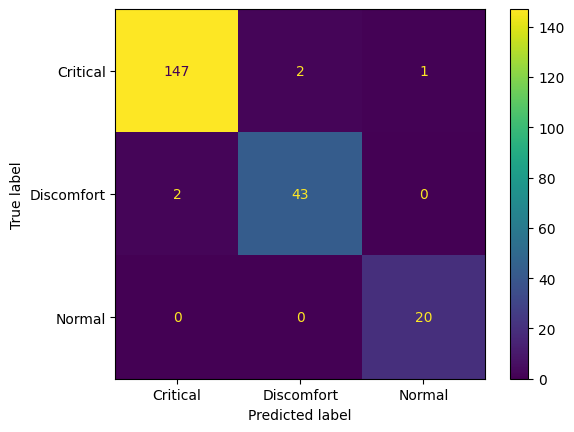

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Critical', 'Discomfort', 'Normal'])
disp.plot()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Critical', 'Discomfort', 'Normal']))

              precision    recall  f1-score   support

    Critical       0.99      0.98      0.98       150
  Discomfort       0.96      0.96      0.96        45
      Normal       0.95      1.00      0.98        20

    accuracy                           0.98       215
   macro avg       0.96      0.98      0.97       215
weighted avg       0.98      0.98      0.98       215



In [25]:
import joblib

# حفظ نموذج مع ضغط bz2
joblib.dump(classifier, "Smart_Watch.joblib", compress=('bz2', 9))

['Smart_Watch.joblib']

In [26]:
import joblib
import pandas as pd

# تحميل النموذج المحفوظ
model = joblib.load("Smart_Watch.joblib")

# أسماء الأعمدة التي استخدمتها أثناء التدريب
columns = ['Body_Temperature', 'Heart_Rate', 'SPO2']

# إدخال القيم يدويًا (استبدلها بالقيم الفعلية من الحساسات)
input_data = pd.DataFrame([[38, 116 ,94]], columns=columns)

# إجراء التنبؤ
prediction = model.predict(input_data)

# طباعة النتيجة
print(prediction[0])

Critical
